# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:Zacky Faishal Abror
- Email:faishalzacky30@gmail.com
- Id Dicoding:zackyfaishal

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import joblib  
from dotenv import load_dotenv
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

### Menyiapkan data yang akan digunakan

In [2]:
df = pd.read_csv('dataset/data.csv', sep=';', encoding='utf-8')

## Data Understanding

### Analisis Karakteristik Data

#### Data Overview

In [3]:
df.head()

Marital_status  Application_mode  Application_order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime_evening_attendance  Previous_qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous_qualification_grade  Nacionality  Mothers_qualification  \
0                         122.0            1                     19   
1                         160.0            1                      1   
2                         122.0            1                     37   
3                         122.0            1                     38   
4                         100.0            1                     37   

   Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
0                     12  ...                                  0   
1                      3  ...                                  0   
2                     37  ...                                  0   
3                     37  ...                                  0   
4                     38  ...                                  0   

   Curricular_units_2nd_sem_enrolled  Curricular_units_2nd_sem_evaluations  \
0                                  0                                     0   
1                                  6                                     6   
2                                  6                                     0   
3                                  6                                    10   
4                                  6                                     6   

   Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
0                                  0                        0.000000   
1                                  6                       13.666667   
2                                  0                        0.000000   
3                                  5                       12.400000   
4                                  6                       13.000000   

   Curricular_units_2nd_sem_without_evaluations  Unemployment_rate  \
0                                             0               10.8   
1                                             0               13.9   
2                                             0               10.8   
3                                             0                9.4   
4                                             0               13.9   

   Inflation_rate   GDP    Status  
0             1.4  1.74   Dropout  
1            -0.3  0.79  Graduate  
2             1.4  1.74   Dropout  
3            -0.8 -3.12  Graduate  
4            -0.3  0.79  Graduate  

[5 rows x 37 columns]

##### Insight

- Dataset terdiri dari **37 fitur** yang mencakup aspek demografis, akademik, dan ekonomi.
- Sebagian besar fitur berbentuk **numerik**, meskipun beberapa merepresentasikan **kategori yang telah dikodekan**.
- Kolom **`Status`** merupakan target variabel dengan kelas utama **Dropout** dan **Graduate**, sehingga masalah yang dihadapi adalah **klasifikasi**.
- Secara kasat mata, siswa dengan status **Dropout** cenderung memiliki performa akademik semester yang lebih rendah dibandingkan **Graduate**.
- Kehadiran variabel ekonomi seperti **unemployment rate**, **inflation rate**, dan **GDP** menunjukkan adanya pengaruh faktor eksternal terhadap risiko dropout.



#### Data Structure and Data Types

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

##### Insight

- Dataset terdiri dari **4.424 baris** dan **37 kolom**, menunjukkan jumlah data yang cukup untuk analisis dan pemodelan.
- Seluruh kolom memiliki **non-null count penuh**, sehingga **tidak terdapat missing values** pada dataset.
- Mayoritas fitur bertipe **integer (29 kolom)**, yang sebagian besar merepresentasikan **variabel kategorikal yang telah dikodekan**.
- Terdapat **7 fitur numerik kontinu** bertipe `float64`, umumnya berkaitan dengan **nilai akademik dan kondisi ekonomi**.
- Kolom **`Status`** bertipe `object` dan berperan sebagai **target variabel** dalam permasalahan klasifikasi dropout.
- Ukuran memori dataset relatif kecil (~1.2 MB), sehingga efisien untuk diproses dan dilatih menggunakan berbagai algoritma machine learning.


#### Statistical Summary (Numerical Features)

In [5]:
df.describe()

Marital_status  Application_mode  Application_order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         1.178571         18.669078           1.727848  8856.642631   
std          0.605747         17.484682           1.313793  2063.566416   
min          1.000000          1.000000           0.000000    33.000000   
25%          1.000000          1.000000           1.000000  9085.000000   
50%          1.000000         17.000000           1.000000  9238.000000   
75%          1.000000         39.000000           2.000000  9556.000000   
max          6.000000         57.000000           9.000000  9991.000000   

       Daytime_evening_attendance  Previous_qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                4.577758   
std                      0.311897               10.216592   
min                      0.000000                1.000000   
25%                      1.000000                1.000000   
50%                      1.000000                1.000000   
75%                      1.000000                1.000000   
max                      1.000000               43.000000   

       Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                   4424.000000  4424.000000            4424.000000   
mean                     132.613314     1.873192              19.561935   
std                       13.188332     6.914514              15.603186   
min                       95.000000     1.000000               1.000000   
25%                      125.000000     1.000000               2.000000   
50%                      133.100000     1.000000              19.000000   
75%                      140.000000     1.000000              37.000000   
max                      190.000000   109.000000              44.000000   

       Fathers_qualification  ...  \
count            4424.000000  ...   
mean               22.275316  ...   
std                15.343108  ...   
min                 1.000000  ...   
25%                 3.000000  ...   
50%                19.000000  ...   
75%                37.000000  ...   
max                44.000000  ...   

       Curricular_units_1st_sem_without_evaluations  \
count                                   4424.000000   
mean                                       0.137658   
std                                        0.690880   
min                                        0.000000   
25%                                        0.000000   
50%                                        0.000000   
75%                                        0.000000   
max                                       12.000000   

       Curricular_units_2nd_sem_credited  Curricular_units_2nd_sem_enrolled  \
count                        4424.000000                        4424.000000   
mean                            0.541817                           6.232143   
std                             1.918546                           2.195951   
min                             0.000000                           0.000000   
25%                             0.000000                           5.000000   
50%                             0.000000                           6.000000   
75%                             0.000000                           7.000000   
max                            19.000000                          23.000000   

       Curricular_units_2nd_sem_evaluations  \
count                           4424.000000   
mean                               8.063291   
std                                3.947951   
min                                0.000000   
25%                                6.000000   
50%                                8.000000   
75%                               10.000000   
max                               33.000000   

       Curricular_units_2nd_sem_approved  Curricular_units_2nd_sem_grade  \
count                        4424.000000                     44

##### Insight

- Seluruh fitur numerik memiliki **jumlah data lengkap (4.424 observasi)**, konsisten dengan hasil `df.info()` yang menunjukkan tidak adanya missing values.
- Nilai **Previous_qualification_grade** dan **Admission_grade** memiliki rentang yang cukup lebar, menunjukkan **variasi kemampuan akademik awal siswa**.
- Rata-rata nilai akademik semester (`Curricular_units_1st_sem_grade` dan `Curricular_units_2nd_sem_grade`) berada di kisaran **10–12**, dengan nilai minimum **0**, yang mengindikasikan adanya siswa dengan performa akademik sangat rendah.
- Jumlah mata kuliah yang **disetujui (approved)** pada semester pertama dan kedua memiliki median yang relatif moderat, namun terdapat siswa dengan **nilai nol**, yang berpotensi berkorelasi dengan status dropout.
- Sebagian besar siswa memiliki **nol mata kuliah tanpa evaluasi**, terlihat dari nilai kuartil (Q1, median, Q3) yang bernilai 0.
- Variabel ekonomi makro (`Unemployment_rate`, `Inflation_rate`, `GDP`) menunjukkan variasi antar periode, sehingga berpotensi menjadi **faktor eksternal pendukung** dalam analisis risiko dropout.
- Perbedaan antara nilai maksimum dan kuartil atas pada beberapa fitur akademik mengindikasikan **kemungkinan adanya outlier**, yang perlu diperhatikan pada tahap pemodelan.


#### Statistical Summary (All Features)

In [6]:
df.describe(include='all')

Marital_status  Application_mode  Application_order       Course  \
count      4424.000000       4424.000000        4424.000000  4424.000000   
unique             NaN               NaN                NaN          NaN   
top                NaN               NaN                NaN          NaN   
freq               NaN               NaN                NaN          NaN   
mean          1.178571         18.669078           1.727848  8856.642631   
std           0.605747         17.484682           1.313793  2063.566416   
min           1.000000          1.000000           0.000000    33.000000   
25%           1.000000          1.000000           1.000000  9085.000000   
50%           1.000000         17.000000           1.000000  9238.000000   
75%           1.000000         39.000000           2.000000  9556.000000   
max           6.000000         57.000000           9.000000  9991.000000   

        Daytime_evening_attendance  Previous_qualification  \
count                  4424.000000             4424.000000   
unique                         NaN                     NaN   
top                            NaN                     NaN   
freq                           NaN                     NaN   
mean                      0.890823                4.577758   
std                       0.311897               10.216592   
min                       0.000000                1.000000   
25%                       1.000000                1.000000   
50%                       1.000000                1.000000   
75%                       1.000000                1.000000   
max                       1.000000               43.000000   

        Previous_qualification_grade  Nacionality  Mothers_qualification  \
count                    4424.000000  4424.000000            4424.000000   
unique                           NaN          NaN                    NaN   
top                              NaN          NaN                    NaN   
freq                             NaN          NaN                    NaN   
mean                      132.613314     1.873192              19.561935   
std                        13.188332     6.914514              15.603186   
min                        95.000000     1.000000               1.000000   
25%                       125.000000     1.000000               2.000000   
50%                       133.100000     1.000000              19.000000   
75%                       140.000000     1.000000              37.000000   
max                       190.000000   109.000000              44.000000   

        Fathers_qualification  ...  Curricular_units_2nd_sem_credited  \
count             4424.000000  ...                        4424.000000   
unique                    NaN  ...                                NaN   
top                       NaN  ...                                NaN   
freq                      NaN  ...                                NaN   
mean                22.275316  ...                           0.541817   
std                 15.343108  ...                           1.918546   
min                  1.000000  ...                           0.000000   
25%                  3.000000  ...                           0.000000   
50%                 19.000000  ...                           0.000000   
75%                 37.000000  ...                           0.000000   
max                 44.000000  ...                          19.000000   

        Curricular_units_2nd_sem_enrolled  \
count                         4424.000000   
unique                                NaN   
top                                   NaN   
freq                                  NaN   
mean                             6.232143   
std                              2.195951   
min                              0.000000   
25%                              5.000000   
50%                              6.000000   
75%                              7.000000   
max                             23.000000   

        Curricular_

#### Memisahkan Data Numerik dan Kategorikal

In [7]:
# Memilih kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.remove("Age_at_enrollment") 
numeric_cols.remove("Admission_grade")    
numeric_cols.remove("Curricular_units_1st_sem_grade")
numeric_cols.remove("Curricular_units_2nd_sem_grade")
numeric_cols.remove("Unemployment_rate")
numeric_cols.remove("Inflation_rate")
numeric_cols.remove("GDP")

In [8]:
categorical_cols = df.select_dtypes(include=['int64']).columns.tolist()

# Tidak memasukkan beberapa kolom numerik tertentu
drop_cats = ['Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 
             'Curricular_units_2nd_sem_enrolled', 'Curricular_units_1st_sem_approved', 
             'Curricular_units_2nd_sem_approved', 'Curricular_units_1st_sem_evaluations',
             'Curricular_units_2nd_sem_evaluations', 'Curricular_units_1st_sem_without_evaluations', 
             'Curricular_units_2nd_sem_without_evaluations']
categorical_cols = [col for col in categorical_cols if col not in drop_cats]

#### Visualisasi Data

##### Visualisasi Distribusi Data Numerik

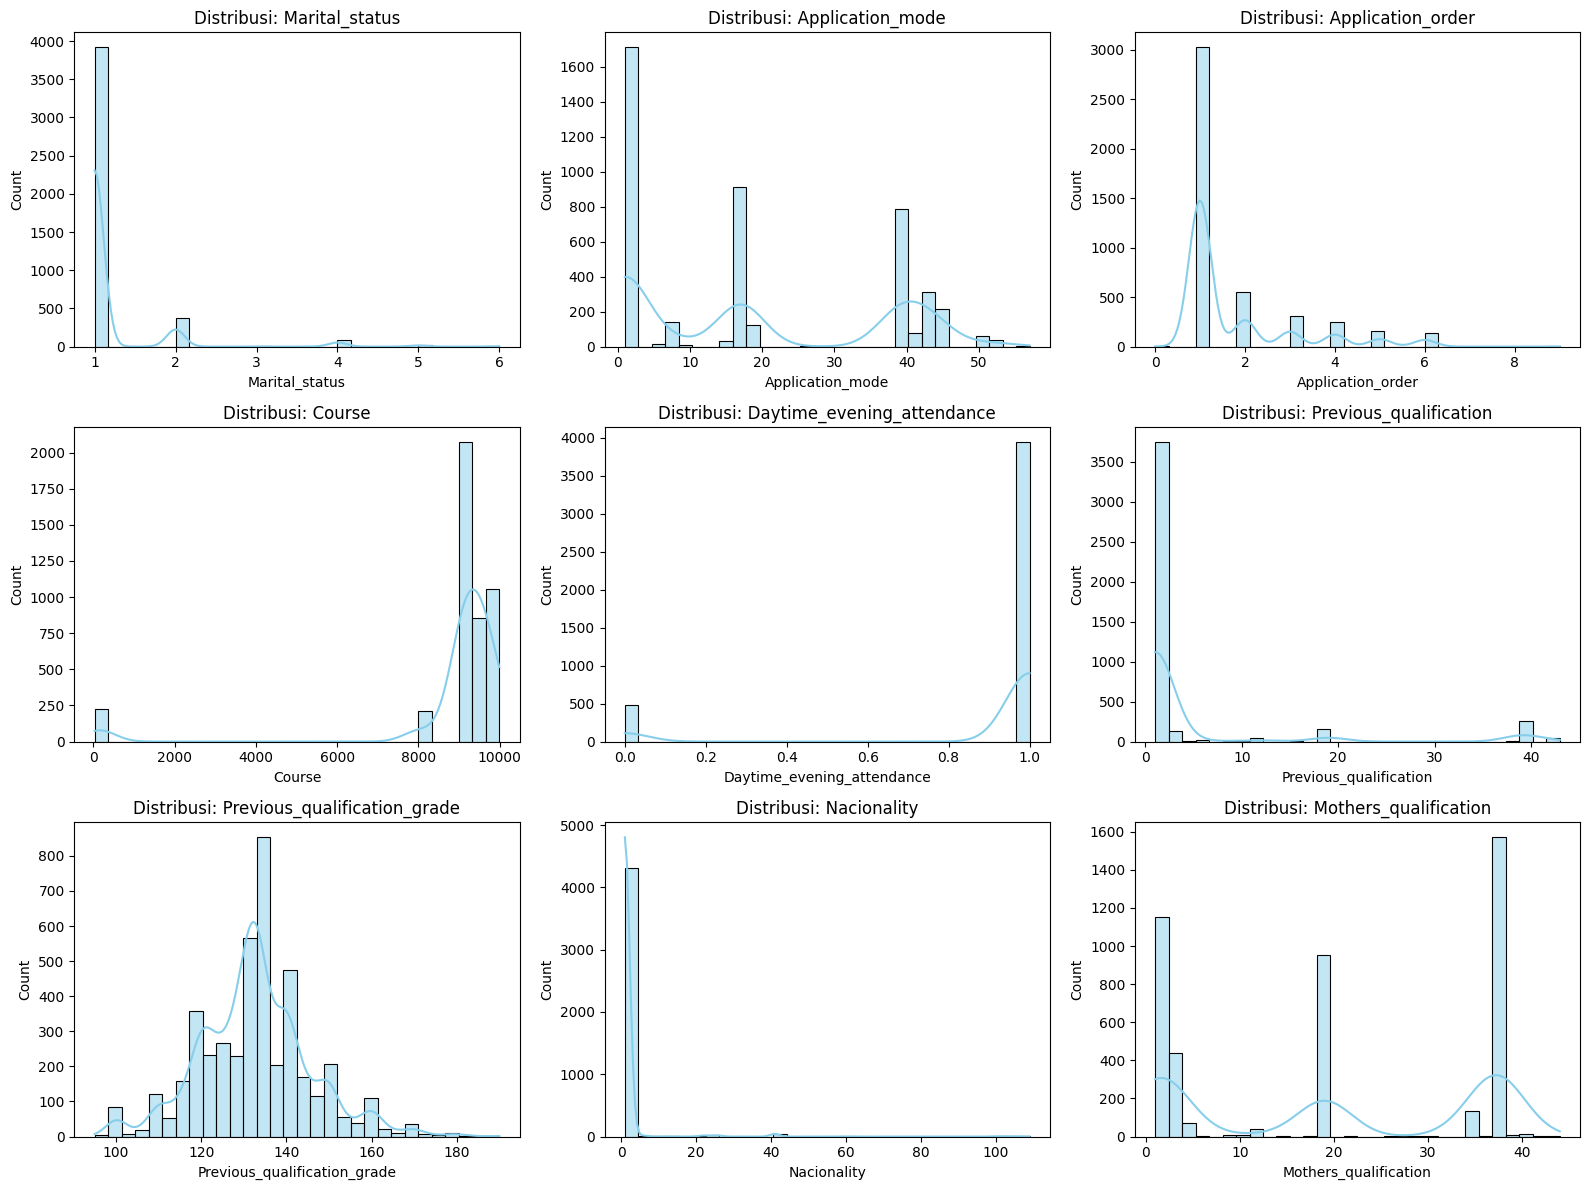

In [10]:
# Visualisasi distribusi kolom numerik
plt.figure(figsize=(16, 12))
for i, col in enumerate(numeric_cols[:9]):  # tampilkan 9 pertama jika terlalu banyak
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Distribusi: {col}')
plt.tight_layout()
plt.show()

**Insight Visualisasi Distribusi Kolom Numerik**

- Sebagian besar fitur numerik menunjukkan **distribusi tidak normal (skewed)**, terutama pada variabel yang merepresentasikan **kategori terkode** seperti `Marital_status`, `Application_mode`, dan `Application_order`.
- Variabel **`Daytime_evening_attendance`** bersifat hampir **biner**, dengan dominasi nilai tertentu, menandakan mayoritas siswa berada pada satu jenis waktu perkuliahan.
- Fitur **`Course`** memiliki rentang nilai yang sangat lebar dengan konsentrasi pada beberapa kode tertentu, menunjukkan bahwa **hanya beberapa program studi yang mendominasi jumlah mahasiswa**.
- **`Previous_qualification`** dan **`Nacionality`** sangat tidak seimbang, di mana sebagian besar observasi terkonsentrasi pada satu atau dua nilai utama, sementara nilai lainnya relatif jarang.
- Distribusi **`Previous_qualification_grade`** relatif mendekati normal, namun masih menunjukkan **ekor distribusi**, yang mengindikasikan adanya siswa dengan nilai awal sangat rendah maupun sangat tinggi.
- Pola distribusi ini menunjukkan bahwa banyak fitur **tidak berskala kontinu murni**, sehingga pemilihan model dan teknik preprocessing (misalnya scaling atau encoding) perlu dilakukan secara selektif.
- Secara keseluruhan, visualisasi ini menegaskan bahwa **perbedaan karakteristik siswa cukup heterogen**, yang berpotensi berpengaruh terhadap risiko dropout.


##### Visualisasi Distribusi Data Kategorikal

C:\Users\faish\AppData\Local\Temp\ipykernel_21732\4006558836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
C:\Users\faish\AppData\Local\Temp\ipykernel_21732\4006558836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
C:\Users\faish\AppData\Local\Temp\ipykernel_21732\4006558836.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette='Set2')
C:\Users\faish\AppData\Local\Temp\ipykernel_21732\4006558836.py:5: FutureWarning: 

Passing `palette` with

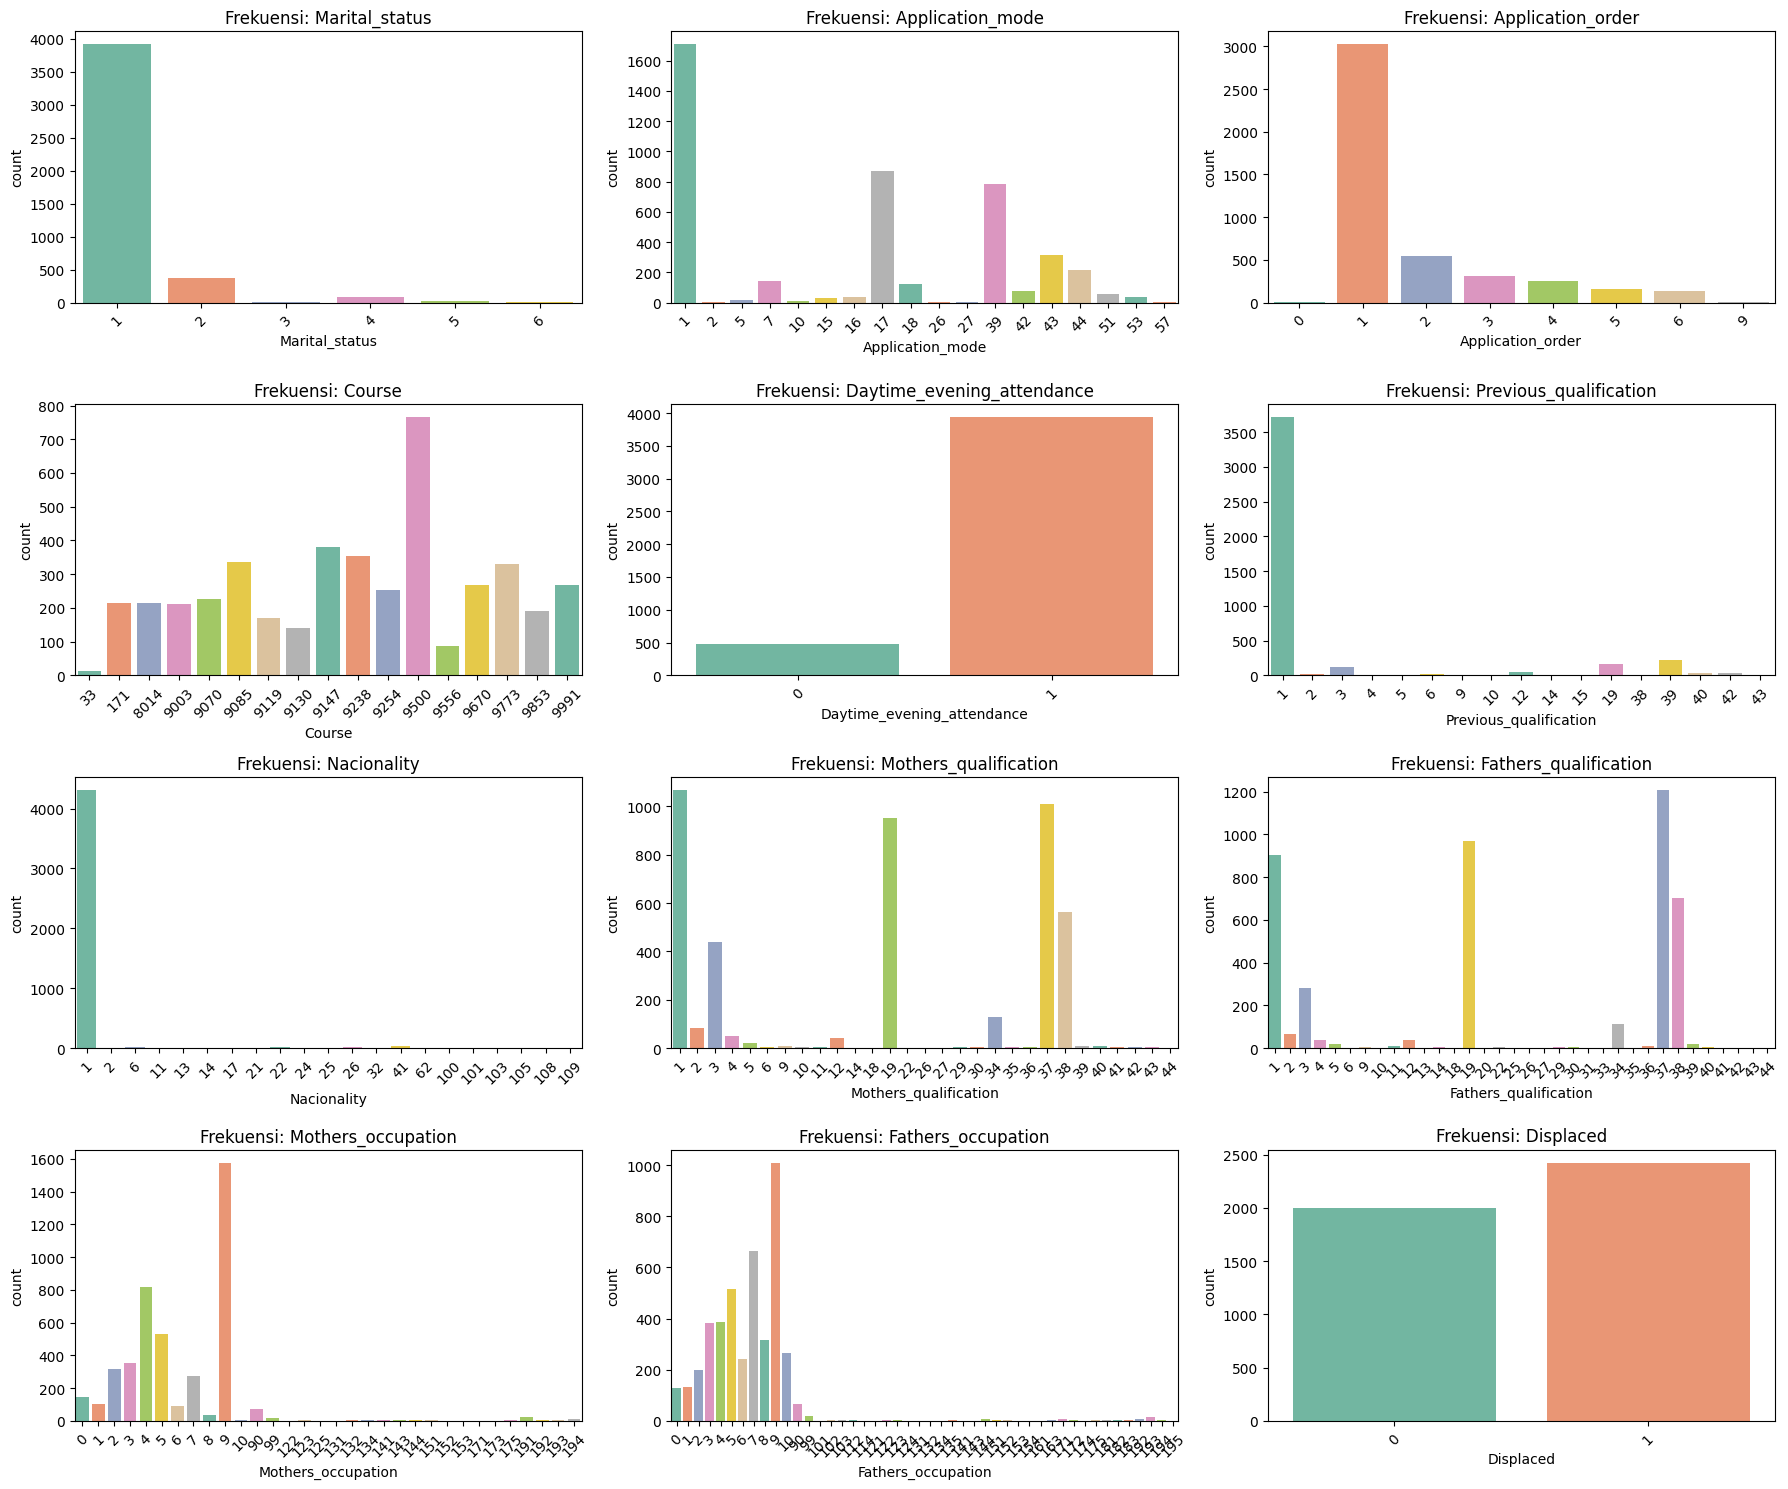

In [11]:
# Visualisasi bar plot untuk masing-masing kolom kategorikal
plt.figure(figsize=(18, 15))
for i, col in enumerate(categorical_cols[:12]):  # batasi agar tidak terlalu banyak
    plt.subplot(4, 3, i+1)
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Frekuensi: {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight Visualisasi Kolom Kategorikal**

- Sebagian besar kolom kategorikal menunjukkan **distribusi yang sangat tidak seimbang**, di mana hanya satu atau dua kategori mendominasi sebagian besar data.
- Kolom **`Marital_status`** didominasi oleh satu kategori utama, yang menunjukkan mayoritas siswa berada pada status pernikahan yang sama.
- **`Application_mode`** dan **`Application_order`** memiliki beberapa kategori dengan frekuensi jauh lebih tinggi, menandakan adanya **pola jalur dan urutan pendaftaran yang dominan**.
- Distribusi pada **`Course`** memperlihatkan bahwa hanya beberapa program studi yang memiliki jumlah mahasiswa paling banyak.
- Kolom **`Daytime_evening_attendance`** sangat timpang, dengan mayoritas siswa mengikuti perkuliahan pada satu jenis waktu tertentu.
- **`Previous_qualification`** didominasi oleh satu latar belakang pendidikan, sementara kategori lainnya relatif jarang muncul.
- **`Nacionality`** hampir seluruhnya terkonsentrasi pada satu kategori, menunjukkan bahwa populasi siswa bersifat **homogen secara kewarganegaraan**.
- **`Mothers_qualification`** dan **`Fathers_qualification`** menunjukkan variasi tingkat pendidikan orang tua, dengan beberapa kategori yang lebih dominan dan berpotensi berkaitan dengan kondisi sosial ekonomi siswa.
- **`Mothers_occupation`** dan **`Fathers_occupation`** memiliki banyak kategori dengan distribusi tidak merata, namun tetap menunjukkan **pola dominasi pekerjaan tertentu**.
- Kolom **`Displaced`** memiliki distribusi yang relatif lebih seimbang dibandingkan kolom kategorikal lainnya, sehingga berpotensi menjadi fitur yang relevan dalam analisis risiko dropout.

Visualisasi ini menunjukkan bahwa **ketidakseimbangan kategori merupakan karakteristik utama dataset**, sehingga perlu diperhatikan pada tahap preprocessing dan pemodelan agar hasil analisis tidak bias terhadap kategori mayoritas.


##### Visualisasi Data Target (Status)

C:\Users\faish\AppData\Local\Temp\ipykernel_21732\1828077322.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


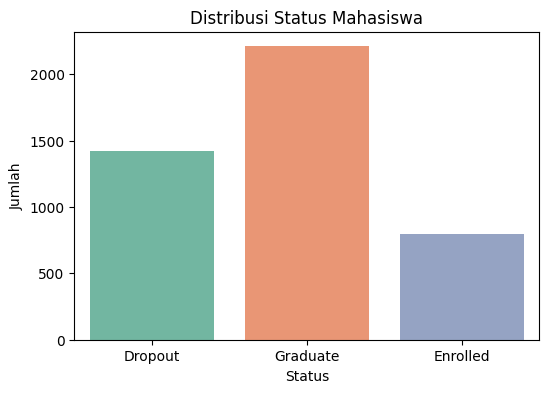

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Distribusi Status Mahasiswa')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()


**Insight Distribusi Status Mahasiswa**

- Mayoritas mahasiswa berada pada status **Graduate**, menunjukkan bahwa sebagian besar siswa berhasil menyelesaikan pendidikannya.
- Status **Dropout** menempati posisi kedua dengan jumlah yang signifikan, menandakan bahwa **tingkat putus studi masih menjadi permasalahan penting** bagi institusi.
- Kategori **Enrolled** memiliki jumlah paling sedikit, yang menunjukkan bahwa hanya sebagian kecil mahasiswa yang masih berada dalam proses studi.
- Distribusi ini mengindikasikan adanya **ketidakseimbangan kelas**, dengan kelas Graduate sebagai kelas mayoritas.
- Kondisi class imbalance ini perlu diperhatikan pada tahap pemodelan machine learning, karena dapat memengaruhi performa model dalam mendeteksi mahasiswa berisiko dropout.
- Fokus utama analisis dan solusi yang dikembangkan adalah **mengidentifikasi mahasiswa berpotensi Dropout secara dini**, sehingga intervensi dapat dilakukan sebelum status tersebut terjadi.


##### Visualisasi Hubungan Antara Data Numerik dan Target

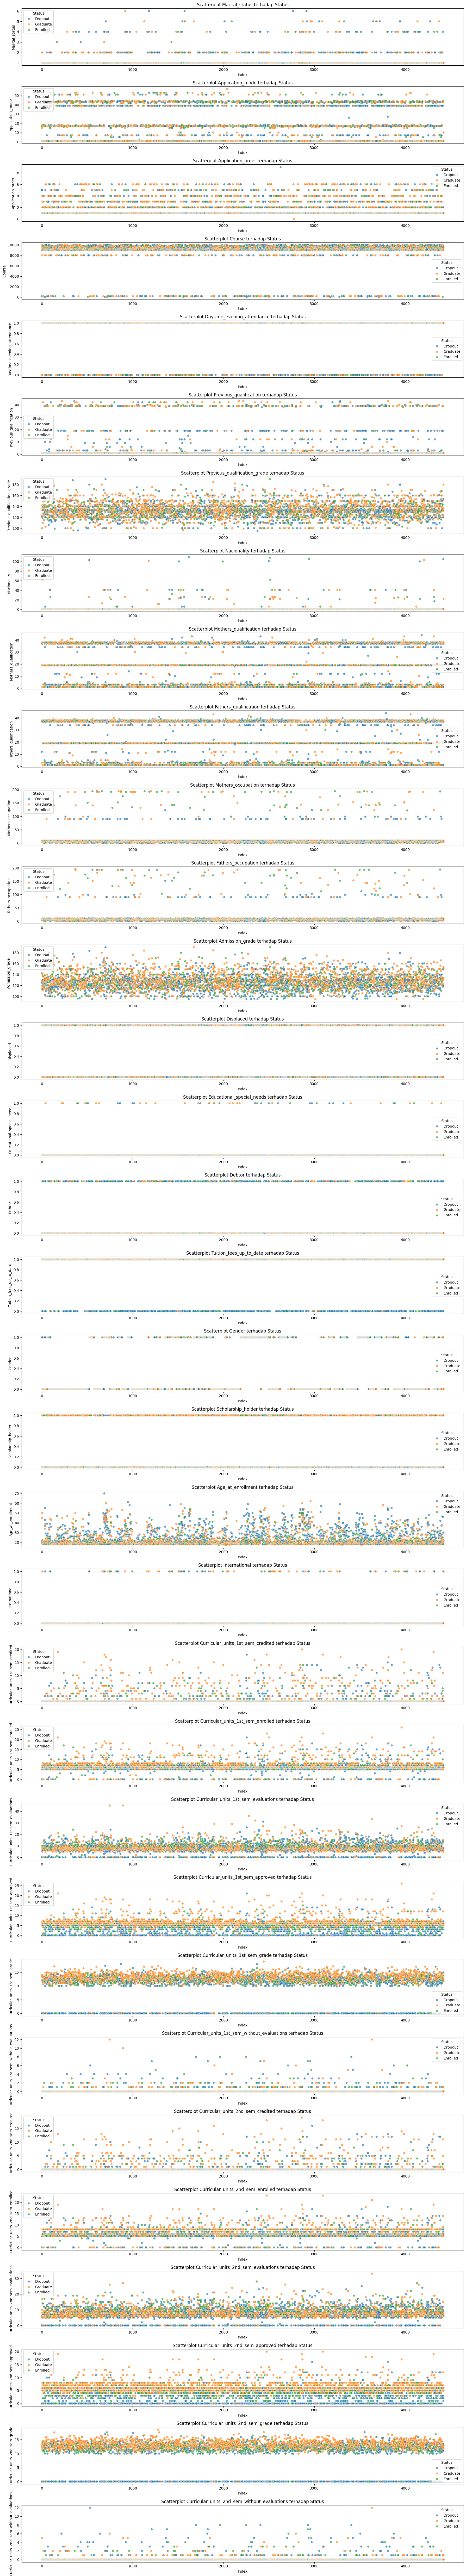

In [13]:
# Daftar semua kolom numerik (tanpa kolom target)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('GDP')
numerical_cols.remove('Inflation_rate')
numerical_cols.remove('Unemployment_rate')

# Buat scatterplot univariate per fitur numerik
plt.figure(figsize=(18, len(numerical_cols) * 3))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.scatterplot(x=df.index, y=col, hue='Status', data=df, alpha=0.7)
    plt.title(f'Scatterplot {col} terhadap Status')
    plt.xlabel('Index')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Insight Hubungan Fitur Numerik terhadap Status Mahasiswa**

- Fitur-fitur akademik seperti **`Curricular_units_1st_sem_approved`**, **`Curricular_units_2nd_sem_approved`**, serta **nilai semester (`*_grade`)** menunjukkan pemisahan pola yang cukup jelas antara status **Dropout** dan **Graduate**.
- Mahasiswa dengan status **Dropout** cenderung terkonsentrasi pada nilai **approved dan grade yang rendah atau nol**, terutama pada semester pertama, yang menandakan performa akademik awal sangat berpengaruh.
- Sebaliknya, mahasiswa **Graduate** lebih banyak muncul pada rentang nilai akademik yang lebih tinggi dan stabil di kedua semester.
- Fitur jumlah mata kuliah yang **enrolled, evaluated, dan credited** menunjukkan bahwa mahasiswa Dropout umumnya memiliki aktivitas akademik yang lebih rendah dibandingkan Graduate.
- Variabel demografis numerik seperti **`Age_at_enrollment`** menunjukkan sebaran yang tumpang tindih antar status, sehingga kontribusinya terhadap pemisahan kelas cenderung lebih lemah dibandingkan fitur akademik.
- Beberapa fitur numerik bersifat diskret dan terkonsentrasi pada nilai tertentu, menyebabkan **overlap antar kelas**, sehingga diperlukan model yang mampu menangkap pola non-linear.
- Secara keseluruhan, visualisasi ini menegaskan bahwa **indikator akademik semester awal merupakan prediktor paling kuat terhadap risiko dropout**, dan sangat relevan untuk digunakan dalam pengembangan model machine learning.

Insight ini mendukung fokus solusi pada **deteksi dini mahasiswa berisiko dropout berbasis performa akademik**, sehingga institusi dapat melakukan intervensi lebih cepat dan tepat sasaran.


##### Visualisasi Hubungan Antara Data Kategorikal dan Target

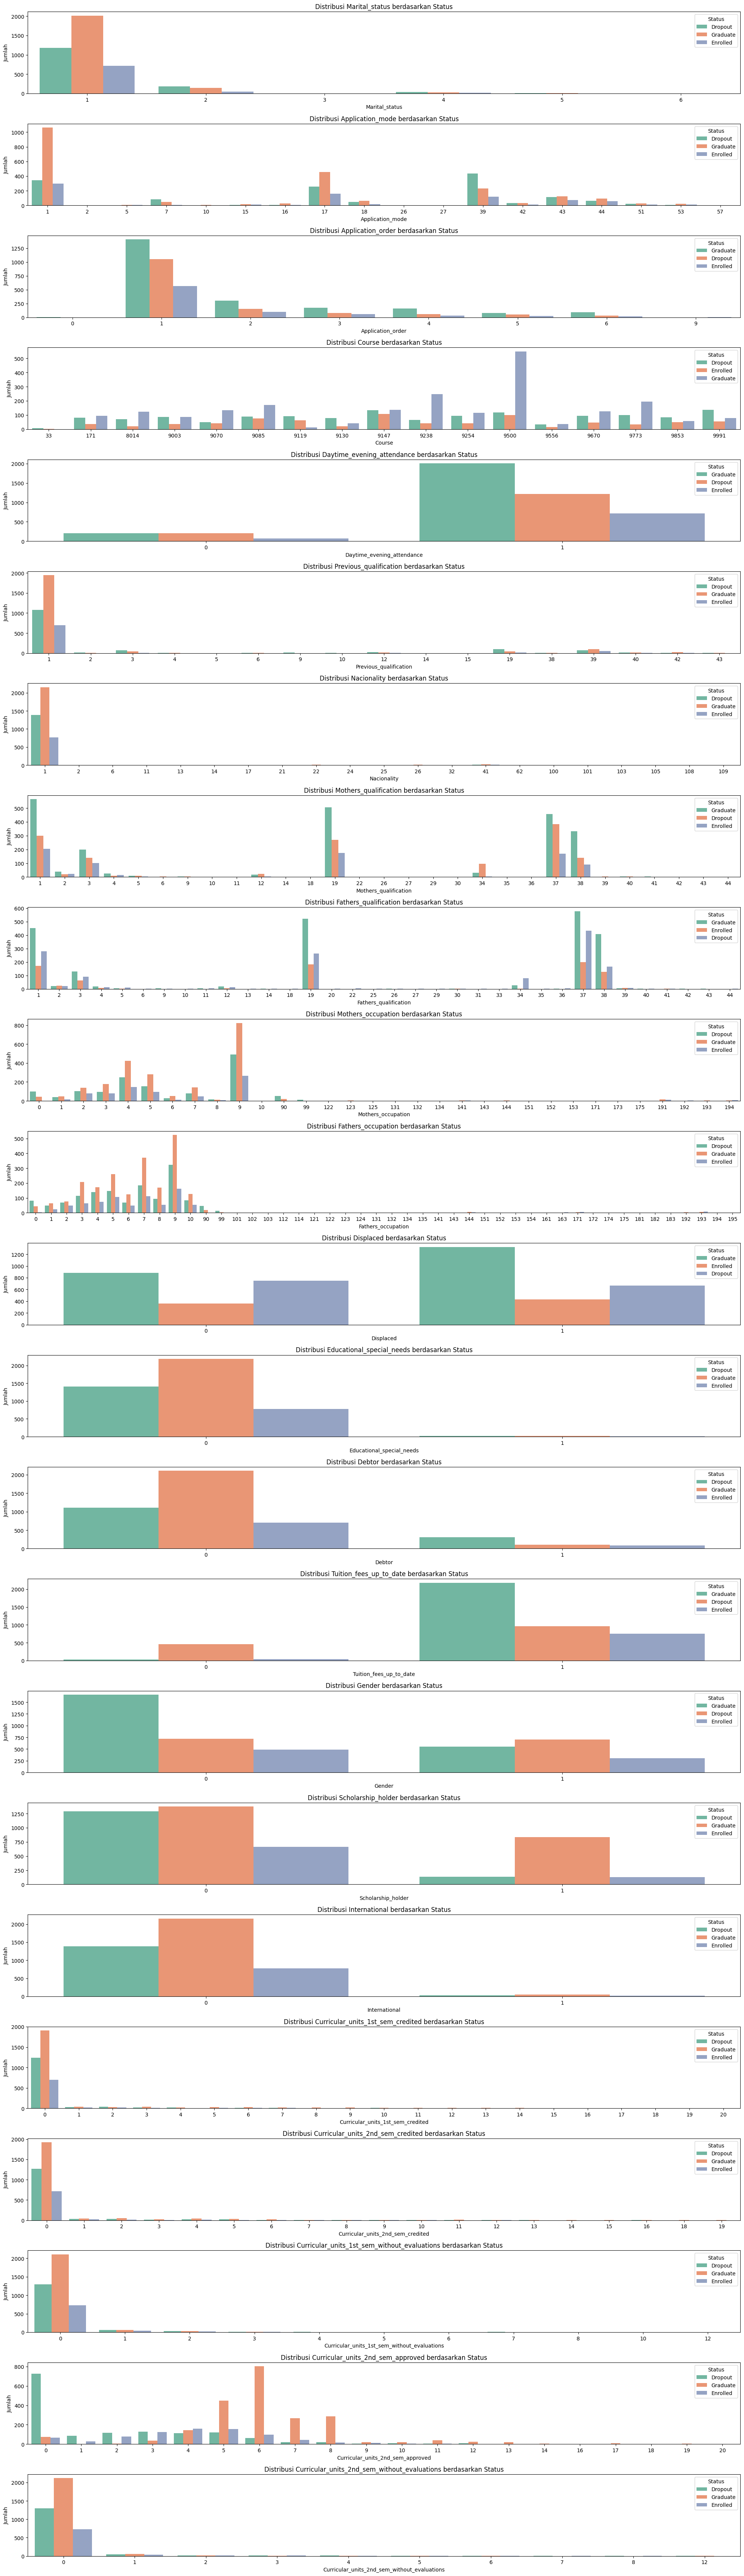

In [14]:
# Tambahkan kolom integer dengan jumlah kategori kecil (asumsi <= 20 unik)
for col in df.select_dtypes(include=['int64']).columns:
    if df[col].nunique() <= 20 and col not in categorical_cols:
        categorical_cols.append(col)

plt.figure(figsize=(20, len(categorical_cols) * 3))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 1, i)
    sns.countplot(x=col, hue='Status', data=df, palette='Set2')
    plt.title(f'Distribusi {col} berdasarkan Status')
    plt.xlabel(col)
    plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

**Insight Hubungan Data Kategorikal terhadap Status Mahasiswa**

- Beberapa variabel akademik dan administratif menunjukkan **perbedaan distribusi yang jelas antar status**, terutama antara **Dropout** dan **Graduate**.
- Mahasiswa dengan status **Dropout** lebih banyak ditemukan pada kategori:
  - **Jumlah mata kuliah disetujui (approved) yang rendah atau nol**
  - **Jumlah mata kuliah tanpa evaluasi yang lebih tinggi**
  - Kondisi **Debtor = 1**, yang mengindikasikan adanya keterkaitan antara masalah finansial dan risiko dropout.
- Variabel **`Tuition_fees_up_to_date`** menunjukkan pola yang kuat, di mana mahasiswa dengan status **Graduate** mayoritas berada pada kategori pembayaran biaya kuliah yang lancar.
- Status **`Scholarship_holder`** memperlihatkan perbedaan distribusi, di mana mahasiswa penerima beasiswa cenderung memiliki proporsi **Graduate** yang lebih tinggi.
- Variabel **`Daytime_evening_attendance`** menunjukkan bahwa mahasiswa pada satu jenis waktu perkuliahan tertentu memiliki proporsi dropout yang lebih besar dibandingkan yang lain.
- Faktor keluarga seperti **`Mothers_qualification`**, **`Fathers_qualification`**, serta **pekerjaan orang tua** menunjukkan variasi distribusi antar status, yang mengindikasikan adanya pengaruh latar belakang sosial ekonomi terhadap keberhasilan studi.
- Variabel **`Gender`** dan **`Marital_status`** menunjukkan perbedaan distribusi yang relatif kecil antar status, sehingga kemungkinan kontribusinya lebih lemah dibandingkan faktor akademik dan finansial.
- Variabel **`Displaced`** dan **`Educational_special_needs`** memperlihatkan perbedaan proporsi antar status, meskipun tidak sekuat indikator akademik.
- Secara keseluruhan, fitur kategorikal yang berkaitan dengan **kinerja akademik awal**, **kondisi finansial**, dan **status administratif mahasiswa** merupakan indikator yang paling relevan dalam membedakan mahasiswa berisiko dropout.

Visualisasi ini menegaskan bahwa **risiko dropout tidak hanya dipengaruhi oleh performa akademik**, tetapi juga oleh **faktor finansial dan administratif**, sehingga pendekatan prediksi yang komprehensif sangat diperlukan.


##### Metrik Korelasi

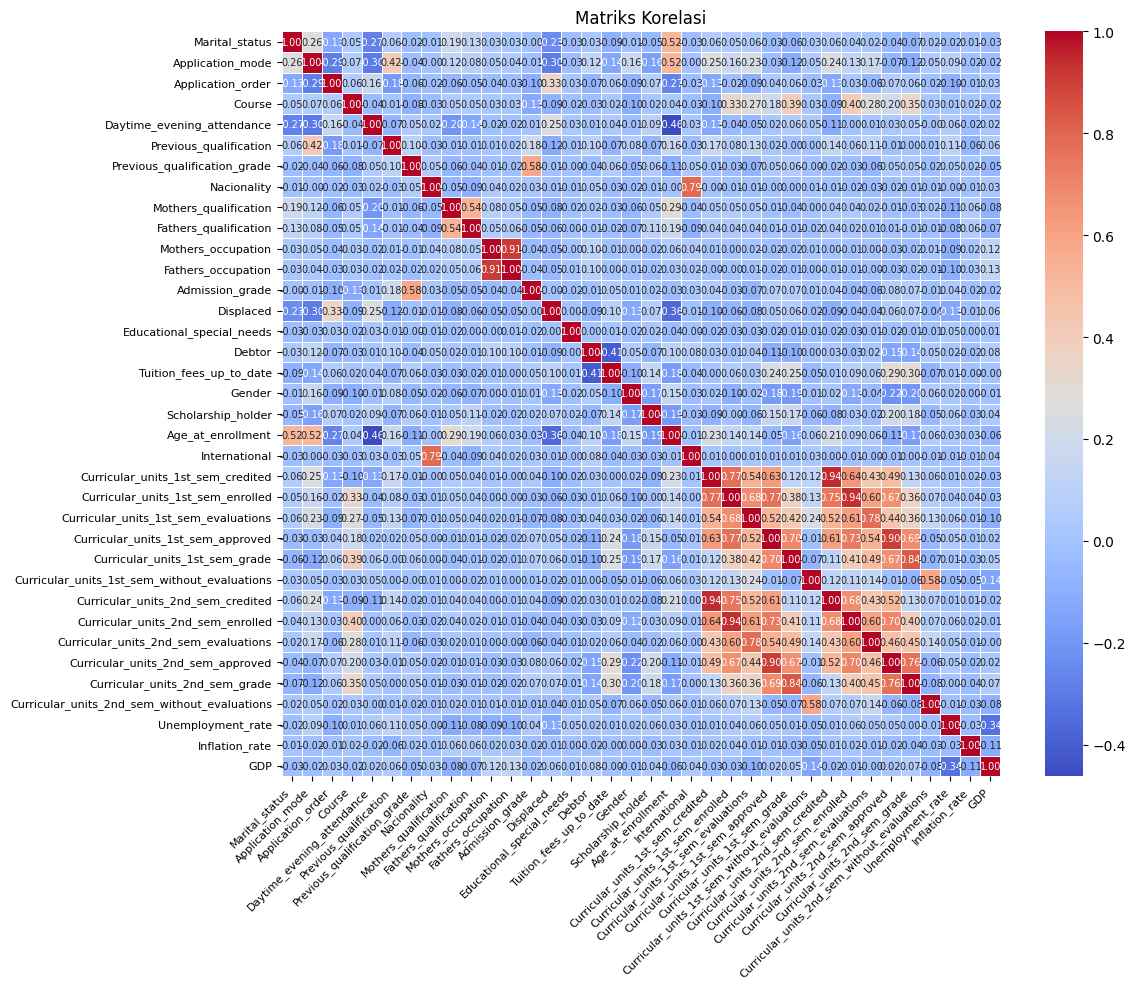

In [15]:
# Inisialisasi dataframe numerik
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 7}, linewidths=0.5, linecolor='white')
plt.title('Matriks Korelasi')
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

**Insight Matriks Korelasi**

- Fitur-fitur akademik antar semester menunjukkan **korelasi positif yang kuat**, khususnya antara:
  - `Curricular_units_1st_sem_approved` dengan `Curricular_units_2nd_sem_approved`
  - `Curricular_units_1st_sem_grade` dengan `Curricular_units_2nd_sem_grade`
  Hal ini menunjukkan bahwa **performa akademik cenderung konsisten antar semester**.
- Variabel jumlah mata kuliah seperti **enrolled, evaluated, dan approved** memiliki korelasi tinggi satu sama lain, yang mengindikasikan adanya **redundansi informasi** di antara fitur-fitur tersebut.
- Fitur **`Admission_grade`** dan **`Previous_qualification_grade`** memiliki korelasi positif moderat dengan nilai akademik semester, menandakan bahwa **kualitas akademik awal berpengaruh terhadap performa selanjutnya**.
- Variabel demografis seperti **`Gender`**, **`Marital_status`**, dan **`Age_at_enrollment`** menunjukkan korelasi yang relatif rendah terhadap fitur akademik, sehingga kontribusinya secara linear cenderung terbatas.
- Variabel ekonomi makro (**`Unemployment_rate``, `Inflation_rate`, dan `GDP`**) menunjukkan korelasi yang sangat rendah dengan fitur akademik, mengindikasikan **pengaruh tidak langsung atau non-linear** terhadap status mahasiswa.
- Tidak ditemukan korelasi negatif yang sangat kuat antar fitur, sehingga risiko **multikolinearitas ekstrem** relatif rendah, meskipun beberapa fitur akademik memiliki korelasi tinggi.
- Berdasarkan pola korelasi ini, **seleksi fitur** atau penggunaan model yang tahan terhadap multikolinearitas (seperti tree-based models) disarankan untuk tahap pemodelan.

Secara keseluruhan, matriks korelasi menegaskan bahwa **indikator akademik merupakan faktor paling dominan** dalam membedakan performa dan risiko dropout mahasiswa, sementara faktor demografis dan ekonomi berperan sebagai pendukung.


## Data Preparation / Preprocessing

### Persiapan Supabase

In [16]:
from sqlalchemy import create_engine
# from sqlalchemy.pool import NullPool
from dotenv import load_dotenv
import os

# Load environment variables from .env
load_dotenv()

# Fetch variables
USER = os.getenv("user")
PASSWORD = os.getenv("password")
HOST = os.getenv("host")
PORT = os.getenv("port")
DBNAME = os.getenv("dbname")

# Construct the SQLAlchemy connection string
DATABASE_URL = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}?sslmode=require"

# Create the SQLAlchemy engine
engine = create_engine(DATABASE_URL)
# If using Transaction Pooler or Session Pooler, we want to ensure we disable SQLAlchemy client side pooling -
# https://docs.sqlalchemy.org/en/20/core/pooling.html#switching-pool-implementations
# engine = create_engine(DATABASE_URL, poolclass=NullPool)

# Test the connection
try:
    with engine.connect() as connection:
        print("Connection successful!")
except Exception as e:
    print(f"Failed to connect: {e}")

python-dotenv could not parse statement starting at line 6
python-dotenv could not parse statement starting at line 8


Connection successful!


In [17]:
df.to_sql('students', engine, if_exists='replace', index=False)

9

### Imputasi Data

In [18]:
# Imputasi:
# - Numerik: median
# - Kategorikal: modus
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

### Memastikan Feature dengan tipe kategorikal

In [19]:
categorical_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Nacionality', 'Mothers_qualification',
    'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
    'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International'
]

# Cast kolom-kolom tersebut ke kategori
for col in categorical_features:
    df[col] = df[col].astype('category')


### Encode Data kategorikal

In [20]:
# Encode kategori ke numerik menggunakan `.cat.codes`
for col in categorical_features:
    df[col] = df[col].cat.codes


### Feature Scaler

In [21]:
scaler = StandardScaler()
numerical_features_to_scale = [
    'Application_order',
    'Previous_qualification_grade',
    'Admission_grade',
    'Age_at_enrollment',
    'Curricular_units_1st_sem_credited',
    'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations',
    'Curricular_units_1st_sem_approved'
]

# Scaling
df[numerical_features_to_scale] = scaler.fit_transform(df[numerical_features_to_scale])

In [23]:
# Save the fitted scaler
joblib.dump(scaler, 'model/standar.pkl')

['model/standar.pkl']

### Split Dataset

In [24]:
# Pisahkan fitur dan label
target_col = 'Status'  
X = df.drop(columns=[target_col])
y = df[target_col]

In [25]:
# Split ke train-test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --- 6. Cetak bentuk data ---
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))

X_train shape: (3539, 36)
X_test shape: (885, 36)
y_train distribution:
 Status
Graduate    0.499294
Dropout     0.321277
Enrolled    0.179429
Name: proportion, dtype: float64


## Modeling

### Buat model dan latih data train

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Prediksi Dataset

In [28]:
y_pred = model.predict(X_test)

### Save Model

In [29]:
joblib.dump(model, 'model/random_forest_model.pkl')
print("Model berhasil disimpan!")

Model berhasil disimpan!


### Load Model

In [30]:
# Load model dari file
loaded_model = joblib.load('model/random_forest_model.pkl')

# Gunakan model yang telah di-load untuk prediksi
y_loaded_pred = loaded_model.predict(X_test)

In [31]:
model = joblib.load('model/random_forest_model.pkl')
print(model.feature_names_in_)

['Marital_status' 'Application_mode' 'Application_order' 'Course'
 'Daytime_evening_attendance' 'Previous_qualification'
 'Previous_qualification_grade' 'Nacionality' 'Mothers_qualification'
 'Fathers_qualification' 'Mothers_occupation' 'Fathers_occupation'
 'Admission_grade' 'Displaced' 'Educational_special_needs' 'Debtor'
 'Tuition_fees_up_to_date' 'Gender' 'Scholarship_holder'
 'Age_at_enrollment' 'International' 'Curricular_units_1st_sem_credited'
 'Curricular_units_1st_sem_enrolled'
 'Curricular_units_1st_sem_evaluations'
 'Curricular_units_1st_sem_approved' 'Curricular_units_1st_sem_grade'
 'Curricular_units_1st_sem_without_evaluations'
 'Curricular_units_2nd_sem_credited' 'Curricular_units_2nd_sem_enrolled'
 'Curricular_units_2nd_sem_evaluations'
 'Curricular_units_2nd_sem_approved' 'Curricular_units_2nd_sem_grade'
 'Curricular_units_2nd_sem_without_evaluations' 'Unemployment_rate'
 'Inflation_rate' 'GDP']


## Evaluation

In [32]:
# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7672316384180791

Classification Report:
               precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       284
    Enrolled       0.57      0.36      0.44       159
    Graduate       0.79      0.92      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.68      0.69       885
weighted avg       0.75      0.77      0.75       885



**Insight Evaluasi Model**

- Model mencapai **akurasi sebesar 76.7%**, yang menunjukkan performa prediksi cukup baik dalam mengklasifikasikan status mahasiswa secara keseluruhan.
- Kelas **Graduate** memiliki performa terbaik dengan **recall tinggi (92%)**, menandakan model sangat efektif dalam mengidentifikasi mahasiswa yang berhasil lulus.
- Kelas **Dropout** menunjukkan kinerja yang cukup seimbang dengan **precision 80%** dan **recall 75%**, sehingga model relatif andal dalam mendeteksi mahasiswa berisiko dropout.
- Kelas **Enrolled** memiliki performa terendah, terutama pada **recall (36%)**, yang mengindikasikan banyak mahasiswa yang masih aktif belajar salah diklasifikasikan sebagai kelas lain.
- Perbedaan performa antar kelas mencerminkan adanya **ketidakseimbangan data**, di mana kelas Graduate mendominasi jumlah observasi.
- Nilai **macro average F1-score (0.69)** yang lebih rendah dibandingkan **weighted average F1-score (0.75)** menegaskan bahwa model masih kurang optimal dalam menangani kelas minoritas.
- Secara keseluruhan, model sudah cukup layak digunakan sebagai **alat deteksi awal risiko dropout**, namun masih memiliki ruang perbaikan terutama dalam membedakan mahasiswa berstatus Enrolled.

Hasil ini menunjukkan bahwa model lebih kuat dalam mengenali pola kelulusan dan dropout dibandingkan status transisi (Enrolled), sehingga optimalisasi lebih lanjut seperti penyeimbangan kelas atau tuning model disarankan.
